In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("used_car_price.csv")
df.head()

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   object 
 11  max_power             1979 non-null   object 
 12  max_torque            1979 non-null   object 
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

In [132]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 0 to 2057
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  1874 non-null   object 
 1   model                 1874 non-null   object 
 2   price_usd             1874 non-null   int64  
 3   year                  1874 non-null   int64  
 4   kilometer             1874 non-null   int64  
 5   fuel_type             1874 non-null   object 
 6   transmission          1874 non-null   object 
 7   color                 1874 non-null   object 
 8   owner                 1874 non-null   object 
 9   seller_type           1874 non-null   object 
 10  engine                1874 non-null   object 
 11  max_power             1874 non-null   object 
 12  max_torque            1874 non-null   object 
 13  drivetrain            1874 non-null   object 
 14  length_mm             1874 non-null   float64
 15  width_mm              1874

In [133]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1870 entries, 0 to 2057
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  1870 non-null   object 
 1   model                 1870 non-null   object 
 2   price_usd             1870 non-null   int64  
 3   year                  1870 non-null   int64  
 4   kilometer             1870 non-null   int64  
 5   fuel_type             1870 non-null   object 
 6   transmission          1870 non-null   object 
 7   color                 1870 non-null   object 
 8   owner                 1870 non-null   object 
 9   seller_type           1870 non-null   object 
 10  engine                1870 non-null   object 
 11  max_power             1870 non-null   object 
 12  max_torque            1870 non-null   object 
 13  drivetrain            1870 non-null   object 
 14  length_mm             1870 non-null   float64
 15  width_mm              1870

In [134]:
columns_to_encode = ['make', 'model', 'fuel_type', 'transmission', 'color', 'owner', 'seller_type', 'engine', 'max_power', 'max_torque', 'drivetrain']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

In [135]:
numerical_features = encoded_df.select_dtypes(include=['int64', 'float64'])
categorical_features = encoded_df.select_dtypes(include=['uint8'])

features = numerical_features.join(categorical_features)

In [136]:
X = features.drop('price_usd', axis=1)
y = features['price_usd']

In [137]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder

In [138]:
selector = SelectKBest(score_func = f_regression, k=7)
X_new = selector.fit_transform(X, y)

In [139]:
selected_feats = X.columns[selector.get_support(indices=True)].tolist()
print(selected_feats)

['year', 'kilometer', 'length_mm', 'width_mm', 'height_mm', 'seating_capacity', 'fuel_tank_capacity_l']


In [140]:
X = features[selected_feats]
X

,year,kilometer,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,2017,87150,3990.0,1680.0,1505.0,5.0,35.0
1,2014,75000,3995.0,1695.0,1555.0,5.0,42.0
2,2011,67000,3585.0,1595.0,1550.0,5.0,35.0
3,2019,37500,3995.0,1745.0,1510.0,5.0,37.0
4,2018,69000,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...
2053,2014,79000,3775.0,1680.0,1620.0,5.0,43.0
2054,2016,90300,4585.0,1890.0,1785.0,7.0,70.0
2055,2014,83000,3495.0,1550.0,1500.0,5.0,32.0
2056,2013,73000,3795.0,1680.0,1427.0,5.0,45.0


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_and_evaluate_model(X, y, model, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    return mse, r2

model = LinearRegression()
mse, r2 = train_and_evaluate_model(X, y, model)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 740011791.1975875
R-squared: 0.43942403832345156


Mean Absolute Error: 12080.47263454531
Root Mean Squared Error: 27203.15774312952


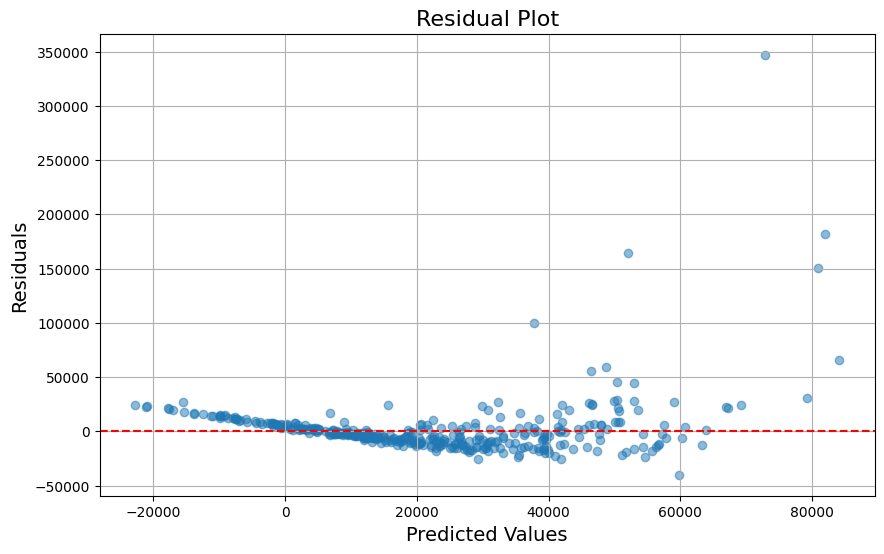

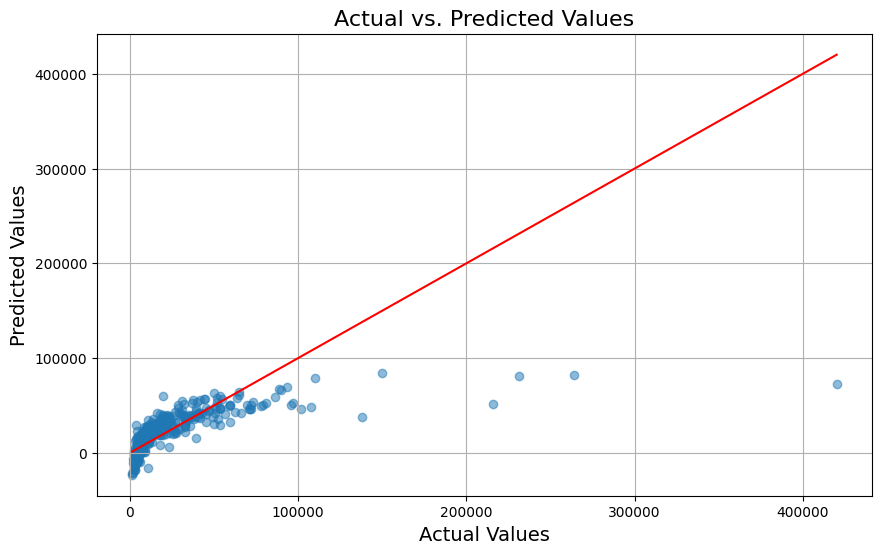

In [142]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))  # Make the figure larger
plt.scatter(y_pred, residuals, alpha=0.5)  # Add transparency to the dots
plt.xlabel("Predicted Values", fontsize=14)  # Increase font size
plt.ylabel("Residuals", fontsize=14)  # Increase font size
plt.title("Residual Plot", fontsize=16)  # Increase font size
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)  # Add a grid
plt.show()

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))  # Make the figure larger
plt.scatter(y_test, y_pred, alpha=0.5)  # Add transparency to the dots
plt.xlabel("Actual Values", fontsize=14)  # Increase font size
plt.ylabel("Predicted Values", fontsize=14)  # Increase font size
plt.title("Actual vs. Predicted Values", fontsize=16)  # Increase font size
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plotting the diagonal line
plt.grid(True)  # Add a grid
plt.show()
